# Final Report - Healthy Eating in Dining Halls 

## Executive Summary

One major issue with college is the "freshman 15", a saying expressing the weight gain of college freshman due to the sudden exposure to large amounts and types of food in the dining halls. Although colleges have made an effort to try to include healthier options in their dining halls, there are ultimately some foods that have horrible nutritional values that are being served to many students each day. This project uses a linear regression model to predict the healthiness of foods at Northeastern University dining halls. The model was trained on a dataset from OpenFoodFacts, the leading nutritional information database in Europe. Our model is able to predict "NutriScore", a nutritional evaluation score created by the french government. 

## Introduction

### The Problem

Maintaining a healthy lifestyle is not a simple task. It takes years to master a routine that will make you feel good, active, and healthy. Within dining halls, the seemingly unlimited food makes it hard for students to make healthy choices. This only negatively contributes to a students struggle to maintain a healthy lifestyle. Although there has been a slight attempt to inform students about the nutritional information about what they are eating, the lack of complete nutritional information in dining halls (usually only calories are displayed; sometimes the wrong amount) makes it extremely difficult for students to know what they are putting in their bodies. This contributes to issues such as bloating and upset stomachs.   

### The Impact of This Project

We hope this project will be able to help students who wish to lead a healthy lifestyle, and those who wish to not eat high fat, low nutrtitional value, foods. We hope by giving students the convenient option to see what foods are good to eat in dining halls, we can bring some attention to the foods themselves, and hopefully change dining hall foods for the better. This project is very expandable, so we hope to be able to implement this in dining halls around the country.

## Data Description

### Our Solution

We believe that by determining the healthy choices a studetn can make in a dining hall, and highlighting the foods that an individual should stay away from, we can help students make healthier decisions, while also bringing light to the unhealthiness of dining hall foods. We can use a very popular nutritional database as our training set.

Text(0.5, 0, 'Nutriscore')

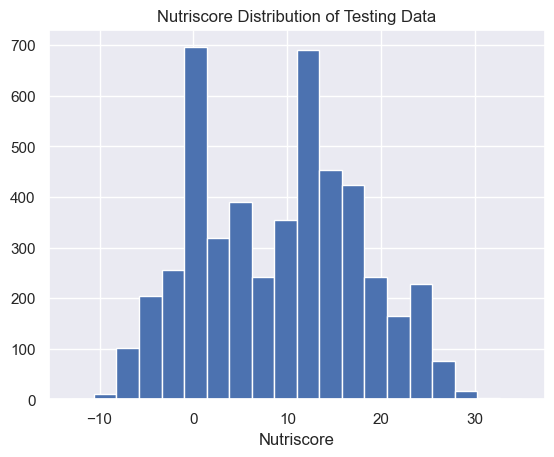

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv('train_final.csv')

sns.set()

# create a histogram
plt.hist(df_data['nutriscore'], bins=20);

# add a title and labels
plt.title('Nutriscore Distribution of Testing Data')
plt.xlabel('Nutriscore')


### Nutrient vs Nutriscore Comparison

Below, from our training data we have plotted the how nutriscore is affected by each food item. In calories, sugars, and fat, there is a very clear relationship between the increase of that nutrient and an increase in nutriscore. On the other hand, carbohydrates and protein seem to have little relationship between the amount of that nutrient and the nutriscore. This is interesting because when people are dieting they tend to like to cut out carbohydrates first.

You may notice that many of the datapoints sit around x = 0, this is because when the amount of that nutrient is 0, the nutriscore is related to factors other than that nutrient

In [19]:
df_data = pd.read_csv('train_final.csv')

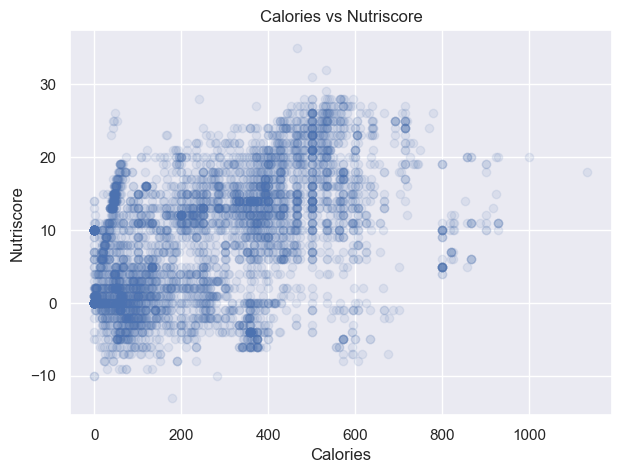

In [34]:
# plot calories vs nutriscore
plt.scatter(df_data['Energy (kcal)'], df_data['nutriscore'], alpha=0.1)
plt.title('Calories vs Nutriscore')
plt.xlabel('Calories')
plt.ylabel('Nutriscore')

plt.gcf().set_size_inches(7, 5)

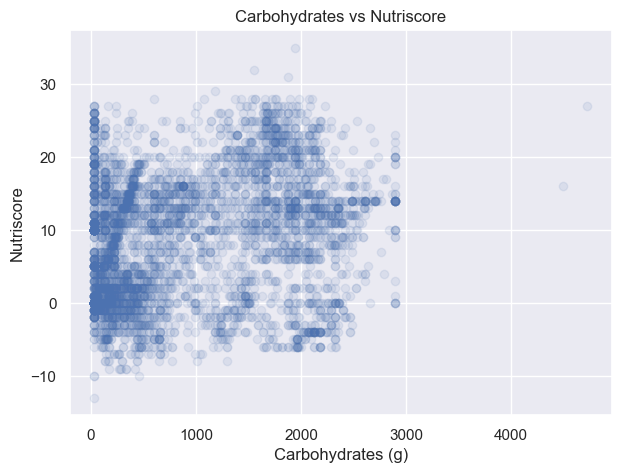

In [40]:
# plot carbs vs nutriscore
plt.scatter(df_data['Carbohydrates (g)'], df_data['nutriscore'], alpha=0.1)
plt.title('Carbohydrates vs Nutriscore')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Nutriscore')

plt.gcf().set_size_inches(7, 5)

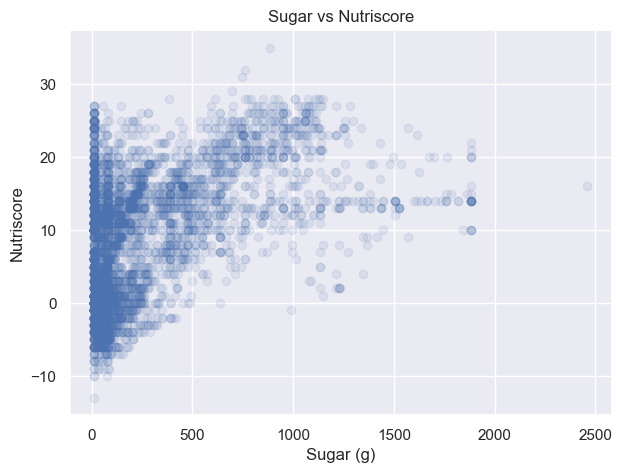

In [37]:
# plot sugar vs nutriscore
plt.scatter(df_data['Sugars (g)'], df_data['nutriscore'], alpha=0.1)
plt.title('Sugar vs Nutriscore')
plt.xlabel('Sugar (g)')
plt.ylabel('Nutriscore')

plt.gcf().set_size_inches(7, 5)

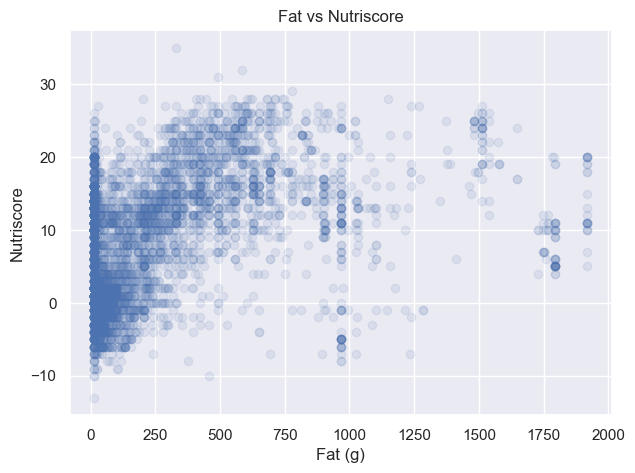

In [39]:
# plot fat vs nutriscore
plt.scatter(df_data['Fat (g)'], df_data['nutriscore'], alpha=0.1)
plt.title('Fat vs Nutriscore')
plt.xlabel('Fat (g)')
plt.ylabel('Nutriscore')

plt.gcf().set_size_inches(7, 5)

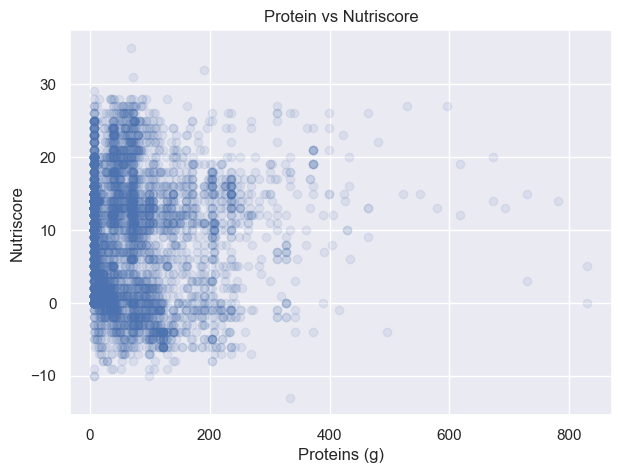

In [44]:
# plot protein vs nutriscore
plt.scatter(df_data['Proteins (g)'], df_data['nutriscore'], alpha=0.1)

plt.title('Protein vs Nutriscore')
plt.xlabel('Proteins (g)')
plt.ylabel('Nutriscore')

plt.gcf().set_size_inches(7, 5)

## Method

The machine learning method we implemented was a RandomForestRegressor. This Is valuable towards our initial goal because It allowed us to roughly predict the Nutriscore of foods in dining halls, and allowed us to gauge the general healthiness of foods in the dining halls.

## Results

### Model

In [50]:
import pandas as pd

# Read the data
df_train = pd.read_csv('train_final.csv')

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import numpy as np

# define features to use
x_feat_list = ['Energy (kcal)', 'Fat (g)', 'Saturated fat (g)', 'Carbohydrates (g)', 'Sugars (g)', 'Proteins (g)']

# extract data from dataframe
x = df_train.loc[:, x_feat_list].values
y = df_train.loc[:, 'nutriscore'].values

# define k-fold cross validation
skfold = KFold(n_splits=10, shuffle=True)

# define forest regressor
rf_reg = RandomForestRegressor()

# create empty array to store predictions
y_pred = np.empty_like(y)

# loop over k-fold cross validation
for train_idx, test_idx in skfold.split(x, y):
    # get the training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]

    # get the test data
    x_test = x[test_idx, :]

    # fit the model
    rf_reg = rf_reg.fit(x_train, y_train)

    # predict the test data
    y_pred[test_idx] = rf_reg.predict(x_test)

# print R^2 score
print(r2_score(y_true=y, y_pred=y_pred))

0.7703196678444971


### Breakfast Predictions

In [59]:
# Read the data
nu_foods_br = pd.read_csv('nu_foods_br.csv')

# extract data from dataframe
nu_x_test = nu_foods_br.loc[:, x_feat_list].values

# predict the test data
nu_y_pred = rf_reg.predict(nu_x_test)

# add the predictions to the dataframe
nu_foods_br['nutriscore'] = nu_y_pred

In [69]:
# sort the dataframe by nutriscore
nu_foods_br.sort_values(by='nutriscore', ascending=True, inplace=True)
# save the dataframe to a csv file
nu_foods_br.to_csv('nu_foods_br_w_nutriscore.csv', index=False)
nu_foods_br

,food,Energy (kcal),Fat (g),Saturated fat (g),Carbohydrates (g),Sugars (g),Proteins (g),nutriscore
12,Sliced Mushrooms,0.00,0.00,0.00,50.00,0.00,50.00,-0.030000
16,Italian Sausage Crumbles,777.78,55.56,22.22,0.00,0.00,44.44,2.040000
26,Cinnamon Raisin Bagel,407.89,2.63,0.00,82.89,9.21,14.47,2.635000
13,Chopped Green Bell Pepper,0.00,0.00,0.00,100.00,100.00,0.00,2.635333
31,Fat Free Cottage Cheese,416.67,0.00,0.00,33.33,16.67,66.67,2.675000
...,...,...,...,...,...,...,...,...
35,"Margarine, Smart Balance, 5g",1000.00,100.00,33.33,0.00,0.00,0.00,12.520333
60,Smart Balance Margarine,900.00,100.00,20.00,0.00,0.00,0.00,12.522000
62,Mild Picante Salsa,500.00,0.00,0.00,100.00,50.00,0.00,13.037000
11,Diced Tomatoes,500.00,0.00,0.00,100.00,50.00,0.00,13.037000


### Dinner Predictions

In [56]:
# Read the data
nu_foods_di = pd.read_csv('nu_foods_di.csv')

# extract data from dataframe
nu_x_test = nu_foods_di.loc[:, x_feat_list].values

# predict the test data
nu_y_pred = rf_reg.predict(nu_x_test)

# add the predictions to the dataframe
nu_foods_di['nutriscore'] = nu_y_pred

In [68]:
# sort the dataframe by nutriscore
nu_foods_di.sort_values(by='nutriscore', ascending=True, inplace=True)
# save the dataframe to a csv file
nu_foods_di.to_csv('nu_foods_di_w_nutriscore.csv', index=False)
nu_foods_di

,food,Energy (kcal),Fat (g),Saturated fat (g),Carbohydrates (g),Sugars (g),Proteins (g),nutriscore
148,Soy Sauce,0.00,0.00,0.0,0.00,0.00,100.00,-0.331833
35,Sliced Mushrooms,0.00,0.00,0.0,50.00,0.00,50.00,-0.030000
100,Fresh Mushrooms,0.00,0.00,0.0,50.00,0.00,50.00,-0.030000
139,Jalapeno Peppers,333.33,11.11,0.0,66.67,22.22,22.22,1.715000
106,Parmesan Cheese,571.43,35.71,25.0,7.14,0.00,57.14,1.840000
...,...,...,...,...,...,...,...,...
33,Diced Tomatoes,500.00,0.00,0.0,100.00,50.00,0.00,13.037000
9,Marinara Sauce,500.00,0.00,0.0,100.00,50.00,0.00,13.037000
172,Mild Picante Salsa,500.00,0.00,0.0,100.00,50.00,0.00,13.037000
23,Shredded Coconut,600.00,40.00,40.0,60.00,60.00,0.00,13.128000


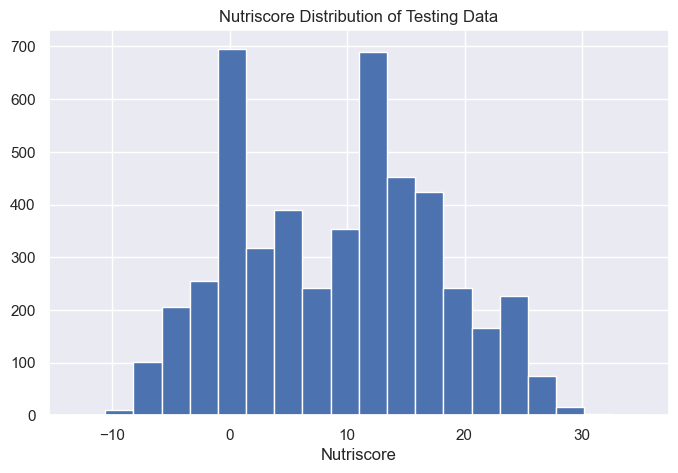

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_data = pd.read_csv('train_final.csv')

sns.set()

# create a histogram
plt.hist(df_data['nutriscore'], bins=20)

# add a title and labels
plt.title('Nutriscore Distribution of Testing Data')
plt.xlabel('Nutriscore');
plt.gcf().set_size_inches(8, 5)

Text(0.5, 0, 'Nutriscore')

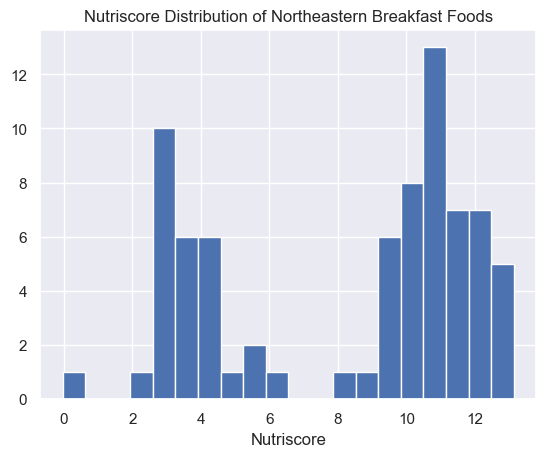

In [73]:
nu_foods = pd.read_csv('nu_foods_br_w_nutriscore.csv')

# create a histogram
plt.hist(nu_foods['nutriscore'], bins=20)

# add a title and labels
plt.title('Nutriscore Distribution of Northeastern Breakfast Foods')
plt.xlabel('Nutriscore')

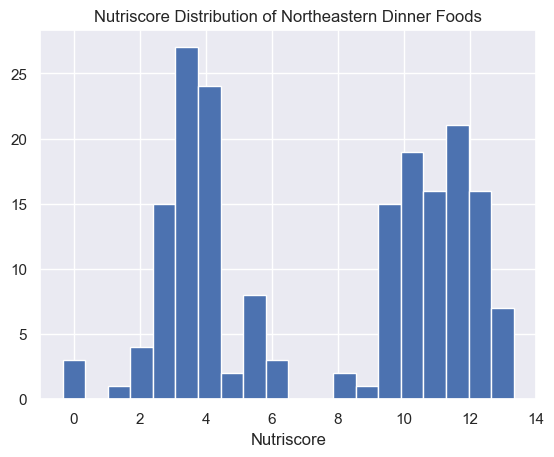

In [66]:
nu_foods = pd.read_csv('nu_foods_di_w_nutriscore.csv')

# create a histogram
plt.hist(nu_foods['nutriscore'], bins=20)

# add a title and labels
plt.title('Nutriscore Distribution of Northeastern Dinner Foods')
plt.xlabel('Nutriscore');

### Discussion

The data is bimodal, meaning that there are two very distinct peaks. This indicates that there are choices for healthy and unhealthy foods in dining halls. However, we noticed that the nutri-scores of the NEU food data were all positive. Nutri-scores are calculated by subtacting the good features from the bad. This indicates that the foods have more unhealthy features than healthy features.

When observing the distribution of nutri-scores for the breakfast data, we found that the histogram was skewed to the left, showing that there were more food items that were unhealthy. The distribution of the nutri-scores for the dinner data was a little harder to interpret. There was a higher count of nutri-scores between 2-4, but appeared to have more counts between 8-14 than the peak and therefore skewed left as well. We came to a conclusion that there were more unhealthy food items than healthy ones.

We had limitations when training our data, which could have led to these results. First, we did not account for vitamins or other nutrients when training our data. Second, we dropped a column that influenced the nutri-score in the training data (one that identified the percentage of the food item that is a fruit, vegetable, etc.) Without this column, our model was 5% less accurate than with it (0.8 r^2 compared to 0.75), indicating that this column had a large influence on the nutri-score

We believe that after the analysis we conducted, we can not conclude whether or not Northeastern dining hall foods are "unhealthy". Although, we do believe that although our model has its issues, we belive the rankings produced by our model can guide students to make decisions about their choices in the dining halls that could lead them to healthy options. This may not be the most accurate, but can guide students to look closely into the nutritional facts of each food item and make an educated decision themselves. Our groups believes that the most important ethical implication of this model could be used to inform students about the nutrients they are putting in their bodies in the dining halls, and inspire the to seek healthier options and encourage dining hall head shefs to include healthier options in dining halls.